# Fraudulent Claims Analysis
This analysis aims to answer research question 2, prediction of fraudulent claims. Creating a model that predicts whether an insurance claim is fraudulent or not, enables the automated classification of claims, with no or very little input from a claims officer. A classification model is used to classify a claim as either fraud or not. In practice, in any instance where a model classifies a large number of claims as fraudulent, this warrants a review by a claims investigator or expert.  
This analysis contains 4 sections
1. Data Importing and Inspection
2. Data Preprocessing
3. Feature Engineering
4. Model Building and Evaluation

At the end of this task, the models will be analysed to examine whether machine learning models can be used to detect fraudulent claims

## Section 1: Data Importing and Inspection

### Importing the necessary libraries

In [1]:
# for data importing and manipulation
import pandas as pd   

# for data array and matrix manipulation
import numpy as np  

# for plotting data
import matplotlib.pyplot as plt 
import seaborn as sns

# for encoding and standizing the data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# to handle imbalanced data
from imblearn.over_sampling import SMOTE

# to split the dataset into train and test set
from sklearn.model_selection import train_test_split

# for performing hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# models to be trained
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.cluster import DBSCAN

# for model evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import  silhouette_score
import statistics as sta
from scipy.stats import skew, kurtosis


from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

### Reading the data
The insurance data is in a csv format and imported using tha __read_csv__ function from the __pandas__ library. 

In [2]:
# reading the data into pandas
df = pd.read_csv("insurance_claims.csv")

# printing the first 5 rows
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### Inspecting the data

In [3]:
# printing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
# printing the dscription of the dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


## Section 2: Data Preprocessing
In this section it is ensured that the data contains no unwanted noise, such as null values, wrong data types, and invalid data values. 

Since column _c39 contains only null values, it should be dropped

In [5]:
# dropping the _c39 column, since it doesn't contain any information
df.drop('_c39', axis=1, inplace= True)

### Converting column policy bind date and incident date to datetime type

In [6]:
# converting the date column into a datetime variable
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

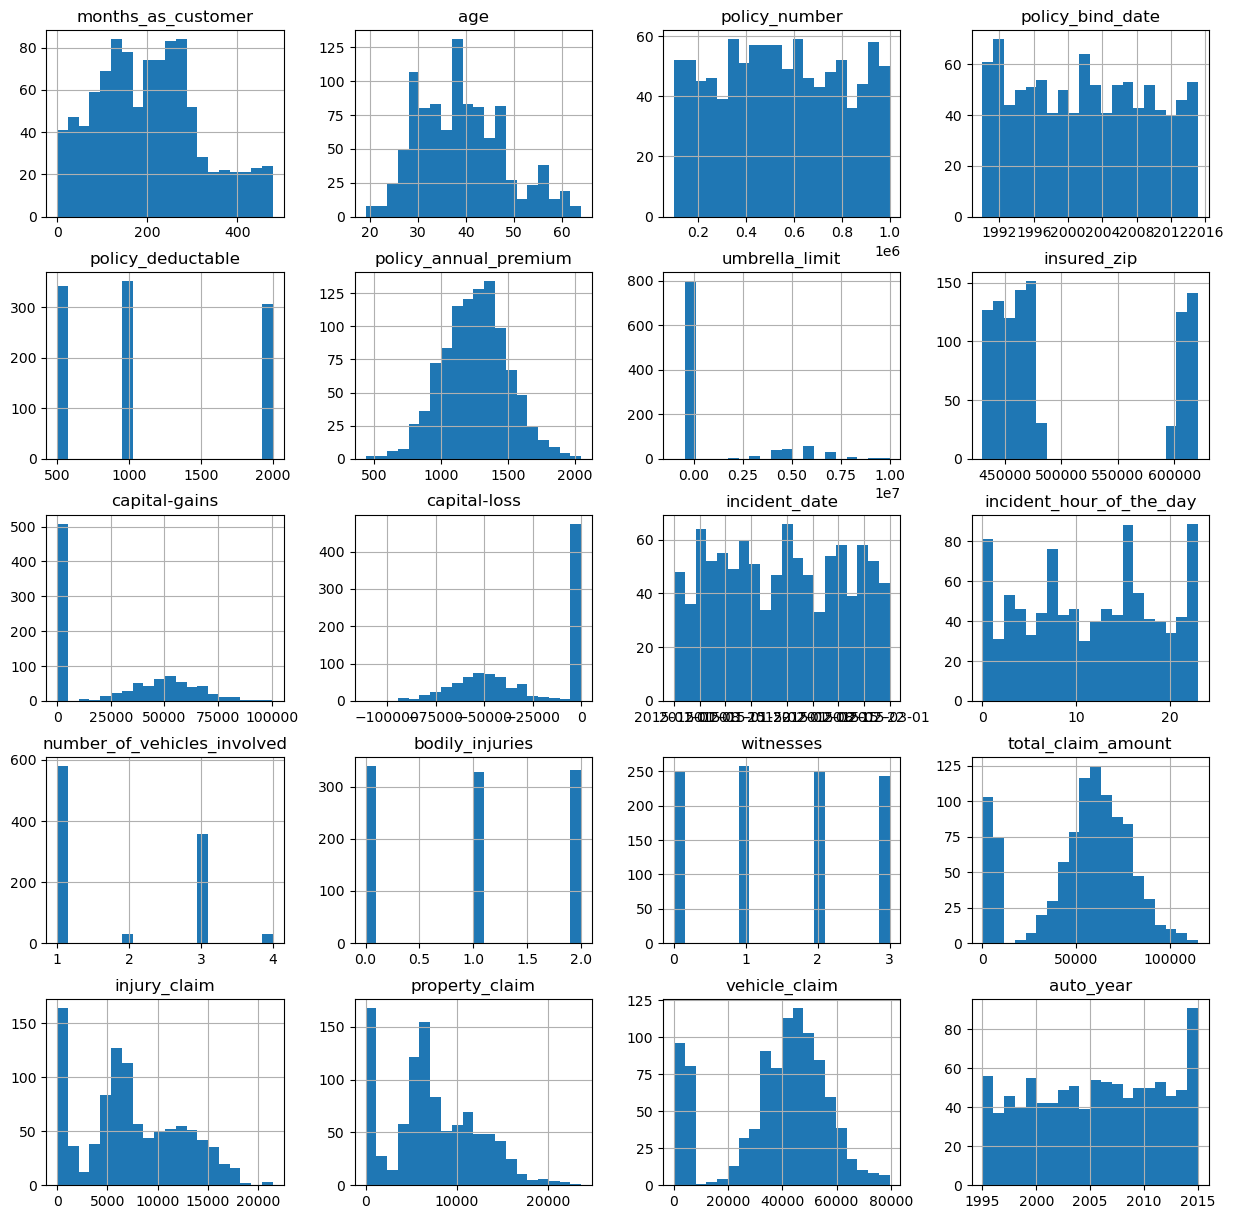

In [7]:
# displaying a histogram of all the numerical columns in the data
df.hist(bins= 20, figsize=(15,15))
plt.show()

#### Checking for implicit null values
The data values sometimes contain values that represent null values or invalid values

In [8]:
# printing the values of the columns to identify the invalid columns in the data
for col in df.columns:
    if df[col].dtype == "object" and len(df[col].unique()) < 50:
        print(str(col))
        print(df[col].unique())
        print('_____________________________________________')

policy_state
['OH' 'IN' 'IL']
_____________________________________________
policy_csl
['250/500' '100/300' '500/1000']
_____________________________________________
insured_sex
['MALE' 'FEMALE']
_____________________________________________
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
_____________________________________________
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
_____________________________________________
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
_____________________________________________
insured_relationship
['husband' 

Policy damage, collision type and police report available has an inconsistent value such as "__?__" and __blank spaces__. These values will have to be converted to Nan and the appropiate action has to be performed.

In [9]:
# replacing ? to nan
df = df.replace(('?', ' '), np.nan)

In [10]:
# printing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

### Visualizing the count of null values

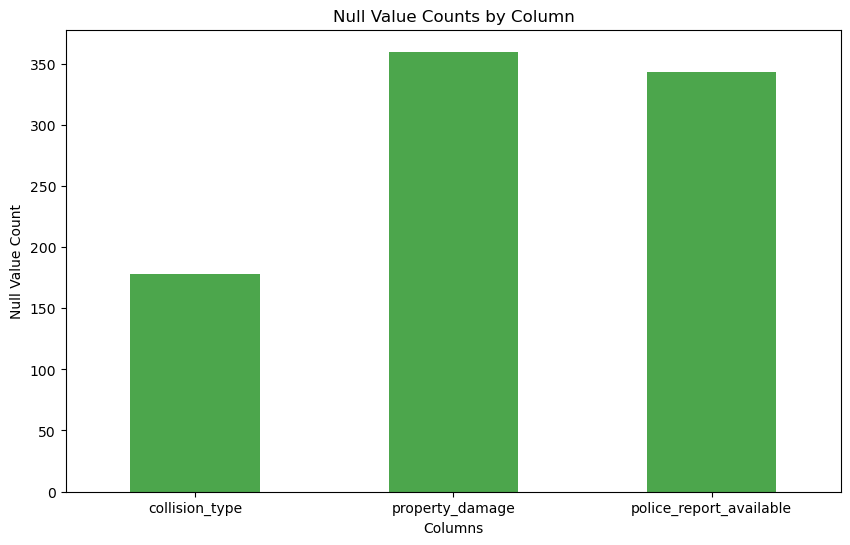

In [11]:
# finding all the null values in the dataset
null_counts = df.isnull().sum()
columns_with_null = null_counts[null_counts > 0]

# Create a bar plot for columns with null values
plt.figure(figsize=(10, 6))
columns_with_null.plot(kind='bar', color='green', alpha=0.7)
plt.title('Null Value Counts by Column')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.xticks(rotation=0)
plt.show()


Only 3 columns have null values however dropping them will drastically reduce the number of rows, hence __another method__ has to be applied. 

In [12]:
# finding the distribution of distinct values in the columns with the null values
for i in ['collision_type', 'property_damage', 'police_report_available']:
    print(df[i].value_counts(1))
    print("_"*50)

Rear Collision     0.355231
Side Collision     0.335766
Front Collision    0.309002
Name: collision_type, dtype: float64
__________________________________________________
NO     0.528125
YES    0.471875
Name: property_damage, dtype: float64
__________________________________________________
NO     0.52207
YES    0.47793
Name: police_report_available, dtype: float64
__________________________________________________


Since there are very close ratio between the values hence replacing them with just the mode will change the distribution. To maintain this distribution, we have to replace the values with each of the values in the same distribution format.

In [13]:
# Ratios for the replacement values
ratios = [0.355231, 0.335766, 0.309002]
replacement_values = ['Rear Collision', 'Side Collision', 'Front Collision']  # Values corresponding to the ratios

# Function to replace null values with ratio-based values
def replace_null_with_ratios(value):
    if pd.isnull(value):
        return np.random.choice(replacement_values, p=[ratio/sum(ratios) for ratio in ratios])
    return value

# Apply the replacement function to each element in the DataFrame
df['collision_type'] = df['collision_type'].apply(replace_null_with_ratios)

In [14]:
# Ratios for the replacement values
ratios = [0.528125, 0.471875]
replacement_values = ['NO', 'YES']  # Values corresponding to the ratios

# Function to replace null values with ratio-based values
def replace_null_with_ratios(value):
    if pd.isnull(value):
        return np.random.choice(replacement_values, p=[ratio/sum(ratios) for ratio in ratios])
    return value

# Apply the replacement function to each element in the DataFrame
df['property_damage'] = df['property_damage'].apply(replace_null_with_ratios)

In [15]:
# Ratios for the replacement values
ratios = [0.52207, 0.47793]
replacement_values = ['NO', 'YES']  # Values corresponding to the ratios

# Function to replace null values with ratio-based values
def replace_null_with_ratios(value):
    if pd.isnull(value):
        return np.random.choice(replacement_values, p=[ratio/sum(ratios) for ratio in ratios])
    return value

# Apply the replacement function to each element in the DataFrame
df['police_report_available'] = df['police_report_available'].apply(replace_null_with_ratios)

__Note: The above code can be simplified using dictionaries, however this way gives a clear view of what is being done__

In [16]:
# printing information about the dataset to check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

### Dropping features: Policy Number, Bind date, Incident date, Auto make, Incident Location, Incident City
These columns contain no valuable information. An argument can be made that the Incident Location and City can contain some information. Although this can be true, encoding them will drastically increase the size of the data and also the model will predict inaccurate results when the location and city of a new incident is not included in the data used to train the model

In [17]:
df.drop(['policy_number', 'policy_bind_date', 'incident_date', 
        'auto_make', 'incident_location', 'incident_city'], 
        axis = 1, inplace = True)

## Section 3: Feature Engineering

This section deals with transforming the features of the data to suit the task at hand. This section involved:
1. Standardizing the numerical columns
2. Encoding the categorical columns
3. Upsampling to ensure the different classes of the target variable have the same count.



### Splitting the data into train and test set

Before beginning these processes, the data is split into train and test set to prevent data leakage. The data predictors are first assigned to x_data and the target variable is assigned to y_data. These two datasets are then split using the sklearn's __train_test_split__ using a test_size of _33%_. 

This will randomly assign _33%_ of the values to the __testset__ and _67%_ of the values to the __trainset__.

In [18]:
# splitting the trainset into dependent and independent sets. The Churn column is the value to be predicted
x_data = df.drop('fraud_reported', axis=1)
y_data = df['fraud_reported']

In [19]:
# splitting the trainset into a training set and a testing set.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=4)

# printing the shapes of the train and test data
print("X train dataset has a size:", x_train.shape)
print("Y train dataset has a size:", y_train.shape)
print("X test dataset has a size:", x_test.shape)
print("Y test dataset has a size:", y_test.shape)

X train dataset has a size: (670, 32)
Y train dataset has a size: (670,)
X test dataset has a size: (330, 32)
Y test dataset has a size: (330,)


In [20]:
# checking the number of distinct classes in the target variable
print("Value count of classes of the target variable:\n", y_train.value_counts())

Value count of classes of the target variable:
 N    509
Y    161
Name: fraud_reported, dtype: int64


The target varaible contains an imbalanced number of classes

### Standardizing and Encoding using ColumnTransformer

Column Transformer provides a comprehensive and simple appraoch to standardize and encode data.

In using the column transformer, we have to specify the method for both encoding categorical data and standardizing numerical data. Different method have to be tested to find the ones that produce the best evaluation values. The StandardScaler and OneHotEncoder showed a higher accuracy than other stardization and encoding methods. 

In this column transformer, the StandardScaler is used to scale the numeric data and the OneHotEncoder is using to encode categorical data. handle_unkown is set to ignore to enable the transformer ignore any class that was not in the dataset used in the fitting of the transformer. 

In [21]:
# The scalers, encoders and the columns to scale and encode are passed as parameters into the column transformer 

# creating a column transformer object
transformer = ColumnTransformer([
    ('scale', StandardScaler(with_mean=False), ['months_as_customer', 'age', 'policy_deductable',
                                                   'policy_annual_premium', 'umbrella_limit', 'insured_zip',
                                                   'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
                                                   'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
                                                   'auto_year']),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'), ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
                                                   'insured_occupation', 'insured_hobbies', 'insured_relationship',
                                                   'incident_type', 'collision_type', 'incident_severity',
                                                   'authorities_contacted', 'incident_state',
                                                    'property_damage', 'police_report_available', 'auto_model'])
                                                ])

In [22]:
# fitting the transformer on the train set
transformer.fit(x_train)

ColumnTransformer(transformers=[('scale', StandardScaler(with_mean=False),
                                 ['months_as_customer', 'age',
                                  'policy_deductable', 'policy_annual_premium',
                                  'umbrella_limit', 'insured_zip',
                                  'capital-gains', 'capital-loss',
                                  'incident_hour_of_the_day',
                                  'number_of_vehicles_involved',
                                  'bodily_injuries', 'witnesses',
                                  'total_claim_amount', 'injury_claim',
                                  'property_claim', 've...',
                                  'auto_year']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['policy_state', 'policy_csl', 'insured_sex',
                                  'insured_education_level',
                                  'insured_occupation', 'insured_hobbies',
                                  'insured_relationship', 'incident_type',
                                  'collision_type', 'incident_severity',
                                  'authorities_contacted', 'incident_state',
                                  'property_damage', 'police_report_available',
                                  'auto_model'])])

In [23]:
# transforming both the train and test set
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [24]:
# printing the shape of the data
print("X train dataset has a size after transforming: ",x_train.shape)
print("X test dataset has a size after transforming: ",x_test.shape)

X train dataset has a size after transforming:  (670, 138)
X test dataset has a size after transforming:  (330, 138)


## Handling Imbalanced Data

Imbalanced data occurs when the distribution of classes is uneven. The class with the highest count in the target class is termed the majority class and the other class or classes are termed the minority class.
Imbalanced data can cause machine learning models to have lower accuracy, as they may be biased towards the majority class and fail to properly classify the minority class.

### Using the Synthetic Minority Over-sampling Technique (SMOTE) to handle the imbalanced dataset

The SMOTE technique creates synthetic data of the minority class to balance the majority class. 

__NOTE__: Introducing synthetic data also introducing some sort of bias into the dataset that will be used to train the model.

Correcting an imbalance in the count of the classes of the target variable prevents the model from learning too much form the majority class and assume that it has a higher significance, and being baised towards the class with a few values. 


In [25]:
# checking the counts of classes of the target variable
print("Value count of classes of the target variable\n", y_train.value_counts())

Value count of classes of the target variable
 N    509
Y    161
Name: fraud_reported, dtype: int64


Looking at the Class attribute which is the target variable, there is an imbalance in the 2 classes. Creating a model with this imbalance is going to give more precedence to the No class and the least to the Yes class.

To correct this, the SMOTE technique is used to upsample the dataset.

__Note__: Training the model without balancing the target variable classes only marginally improved the accuracy of the different models.

In [26]:
# creating the SMOTE instance where the five closest neighbors to a point are used to generate a new point
smote = SMOTE(sampling_strategy='auto', k_neighbors=5)

# fitting and resampling the dataset to create new synthetic datapoints
x_train, y_train = smote.fit_resample(x_train, y_train)

In [27]:
# printing the shape of the new train data
print("X train dataset has a size after upsampling: ",x_train.shape)
print("Y train dataset has a size after upsampling: ",y_train.shape)

X train dataset has a size after upsampling:  (1018, 138)
Y train dataset has a size after upsampling:  (1018,)


In [28]:
# checkinig the counts of the classes of the target variable
print("Value count of classes of the target variable\n", y_train.value_counts())

Value count of classes of the target variable
 Y    509
N    509
Name: fraud_reported, dtype: int64


### Encoding the target variables
Most machine learning models cannot deal with text data as target variable, hence the target column has to be converted into numerical values

In [29]:
# creating a label encoder object
label_encoder = LabelEncoder()

# fitting the label encoder on the train data
label_encoder.fit(y_train)

# transforming the train and test data
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

## Section 4: Model Building and Testing

This session involves creating models and checking the accuracies of the model to make predictions. In this section, the hyperparameters of five models will be tuned to give the best accuracy and the model with the highest accuracy will be finally used to make prediction.



In [30]:
# printing the shape of the train and test data
print("X train dataset has a size:", x_train.shape)
print("Y train dataset has a size:", y_train.shape)
print("X test dataset has a size:", x_test.shape)
print("Y test dataset has a size:", y_test.shape)

X train dataset has a size: (1018, 138)
Y train dataset has a size: (1018,)
X test dataset has a size: (330, 138)
Y test dataset has a size: (330,)


Since this tasks requires customers to be classified as whether the left or not, it is a __Classification__ problem and since the data used to train the model has a labeled target variable __Supervised Classification__ models will be developed and tuned. The supervised classification models considered are 
1. XGBoost Classifier
2. Decision Tree Classifier
2. Random Forest Classifier
3. Support Vector Machines
4. K Neighbors Classifier.

Some selcted hyperparameters of these models will be tuned and their accuracies will be measured using Grid Search. A cross validation value (cv) of 5 will be set in order to split the train data into 5 parts and at each iteration 4 parts will be used to train the model and 1 part will be used to test the model for its accuracy. 

### Performing Hyperparameter Tuning using Grid Search

Hyperparameter tuning allows for different hyperparameters to be trained and evaluated at the same time. Accuracy is used as an evaluation metric for the tuning process.

### Tuning the hyperparameters of a XGBoost Classifier

Default values of the hyperparameters of the Xgboost Classifier that will be tuned are: 
booster = 'gbtree', max_depth = 6, max_bin = 256, max_leaf = 0

In [31]:
# specifying the parameters
parameters = {'max_depth':range(1, 10), 
              'max_bin':range(250, 270, 2), 
              'max_leaves':range(2, 10)}

# creating the grid search model and setting the number of cross validations to 5
model_1 = GridSearchCV(XGBClassifier(), parameters, scoring='accuracy', cv=5, n_jobs=-1)

# training the model
model_1.fit(x_train, y_train)

# Checking accurary of the model and the best hyperparameters
print("Accurary of best XGBoost classifier = {:.2f}%".format(model_1.best_score_*100))
print("Best hyperparameter for the model = {}".format(model_1.best_params_))


Accurary of best XGBoost classifier = 87.74%
Best hyperparameter for the model = {'max_bin': 250, 'max_depth': 6, 'max_leaves': 2}


### Tuning the hyperparameters of a Decision Tree Classifier

Default values of the hyperparameters of the Decision Tree Classifier  that will be tuned are: 
criterion = 'gini', max_depth = None, min_samples_split = 2, max_leaf_nodes = none

In [32]:
# specifying the parameters
parameters = {"criterion": ("gini", "entropy"), 
              'max_depth':range(1, 10), 
              'min_samples_split':range(2, 10), 
              'max_leaf_nodes':range(2, 10)}

# creating the grid search model and setting the number of cross validations to 5
model_2 = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy', cv=5, n_jobs=-1)

# training the model
model_2.fit(x_train, y_train)

# Checking accurary of the model and the best hyperparameters
print("Accurary of best decision tree classifier = {:.2f}%".format(model_2.best_score_*100))
print("Best hyperparameter for the model = {}".format(model_2.best_params_))


Accurary of best decision tree classifier = 88.90%
Best hyperparameter for the model = {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2}


### Tuning the hyperparameters of a Random Forest Classifier

Default values of the hyperparameters a Random Forest Classifier that will be tuned are:
n_estimators=100, criterion = 'gini' , max_depth = None

In [33]:
# defining the hyperparameters
param_grid = {"n_estimators":[100, 200, 300, 400, 500], 
              "criterion":['gini', 'entropy'], 
              "max_depth":range(20, 30, 5)}

# creating the grid search model and setting the number of cross validations to 5
model_3 = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# training the model
model_3.fit(x_train, y_train)

# Checking accurary of the model and the best hyperparameters
print("Accurary of best random forest classifier = {:.2f}%".format(model_3.best_score_*100))
print("Best hyperparameter for the model = {}".format(model_3.best_params_))

Accurary of best random forest classifier = 88.72%
Best hyperparameter for the model = {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}


### Tuning the hyperparameters of a Support Vector Machine

Default values of the hyperparameters a Support Vector Machine that will be tuned are:
kernel = 'rbf', C = 1.0, degree = 3

In [34]:
# specifying the hyperparameters
param_grid = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
              'C':range(1,5),
              'degree':range(1, 5)}

# creating the grid search model and setting the number of cross validations to 5
model_4 = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# training the model
model_4.fit(x_train, y_train)

# Checking accurary of the model and the best hyperparameters
print("Accurary of best logistic regression model = {:.2f}%".format(model_4.best_score_*100))
print("Best hyperparameter for the model = {}".format(model_4.best_params_))

Accurary of best logistic regression model = 88.02%
Best hyperparameter for the model = {'C': 1, 'degree': 1, 'kernel': 'linear'}


### Tuning the hyperparameters of a K Neighbors Classifier

Default values of the hyperparameters a K Neighbors Classifier that will be tuned are: n_neighbors = 5, weights = 'uniform, algorithm = 'auto'


In [35]:
# defining the hyperparameters
params = {"n_neighbors":range(1, 5), 
          "weights":['uniform', 'distance'], 
          "algorithm":['auto', 'ball_tree', 'kd_tree','brute']}

# creating the grid search model and setting the number of cross validations to 5
model_5 = GridSearchCV(KNeighborsClassifier(), params, scoring='accuracy', cv=5, n_jobs=-1)

# training the model
model_5.fit(x_train, y_train)

# Checking accurary of the model and the best hyperparameters
print("Accurary of best Light Gradient Boosting model = {:.2f}%".format(model_5.best_score_*100))
print("Best hyperparameter for the model = {}".format(model_5.best_params_))

Accurary of best Light Gradient Boosting model = 71.71%
Best hyperparameter for the model = {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}


## Testing The Best Model
In this section the best model trained is used and evaluated on the trainset. The Accuracy, Precision, Recall, F1 Score and the Confusion Matrix are printed out for the evaluation of the model.

The best model trained in the hyperparmeter tuning section was the __Decision Tree Classifier__ (model_2). This model is used to predict values of the test set and evaluate its performance.

In [36]:
# making predictions using the test dataset
y_predicted = model_2.predict(x_test)

# calculating the accuracy
accuracy = accuracy_score(y_test, y_predicted)

# creating the confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# calculating precision, recall, and f1 score
precision, recall, f1, support = score(y_test, y_predicted)

# printing the evaluation metrics
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1-Score = ", f1)

Accuracy =  0.8666666666666667
Precision =  [0.96296296 0.68421053]
Recall =  [0.85245902 0.90697674]
F1-Score =  [0.90434783 0.78      ]


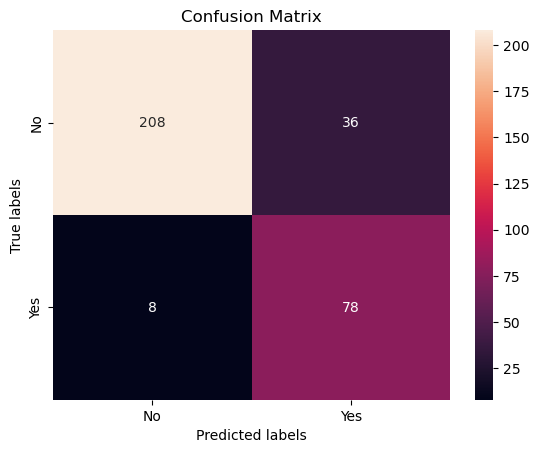

In [37]:
# Creating a plot for the confusion matrix    
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);